# PSM3 Data Aquisition

This notebook aquires high resolution (5min) PSM3 irradiance data and saves the psm3_weatherframe into a file for future use.



In [56]:
from pvlib import iotools
from pvlib.location import Location
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [57]:
# evaluate hood river, oregon and key west, florida

# latitude, longitude, name, altitude, timezone
hood_river = (45.71417626139969, -121.5154782530592, 'Hood River', 27, 'Etc/GMT+8')
latitude, longitude, name, altitude, timezone = hood_river

location = Location(
    latitude,
    longitude,
    name=name,
    altitude=altitude,
    tz=timezone,
    )



api_key='qdp5rTURyNlFwsau1LcTuenQ2h7bcCtQ1dOzOojN'

# organize PSM3 Parameters
#start_date = pd.Timestamp(times[0].date()).tz_localize(location.tz)
#end_date = pd.Timestamp(times[-1].date()).tz_localize(location.tz)
email = 'natecostello@gmail.com'
api_key='qdp5rTURyNlFwsau1LcTuenQ2h7bcCtQ1dOzOojN'
interval = 5
map_variables = True
names = '2022'




In [65]:

# get PSM3 data
psm3_weather, psm3_weather_meta_data = iotools.get_psm3(
    latitude,
    longitude,
    api_key,
    email,
    names=names,
    interval=interval,
    map_variables=map_variables,
    leap_day=True
)


In [67]:
# Save the data to a file
psm3_weather.to_csv('psm3_weather.csv', index=True)



In [68]:
# create dataframe from csv
psm3_weather = pd.read_csv('psm3_weather.csv', index_col=0, parse_dates=True)

In [59]:
# get 5 minute clear sky data for the location
times = pd.date_range('2022-01-01 00:00', '2022-12-31 23:59', freq='5min', tz=location.tz)
clearsky_weather = location.get_clearsky(times)

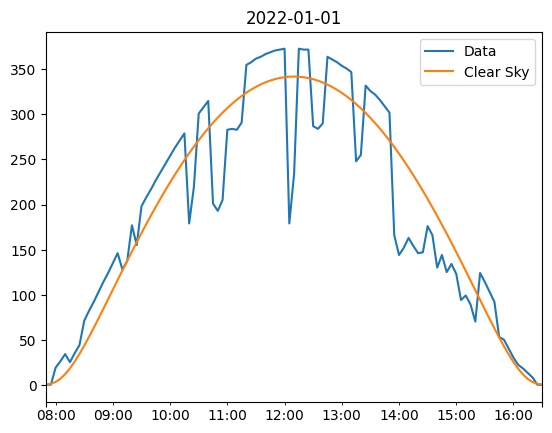

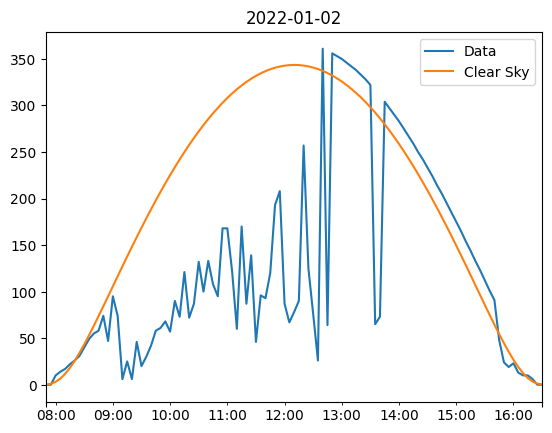

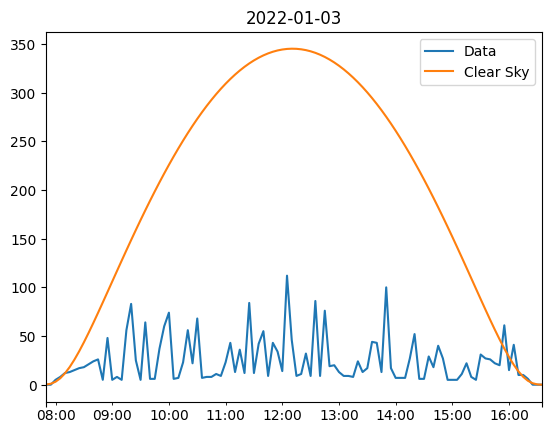

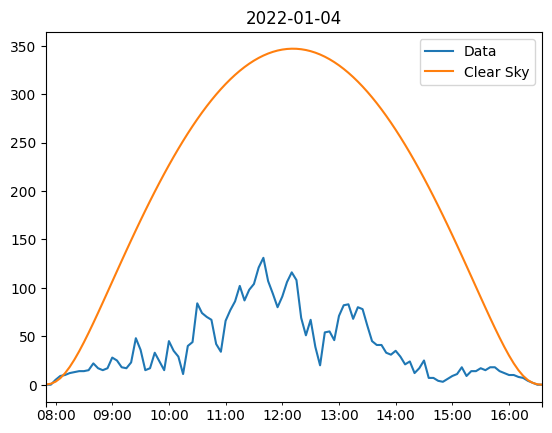

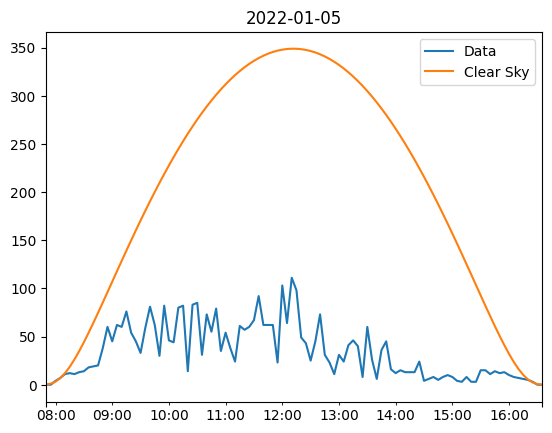

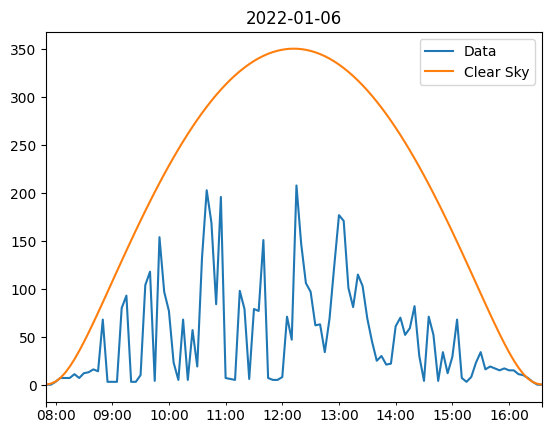

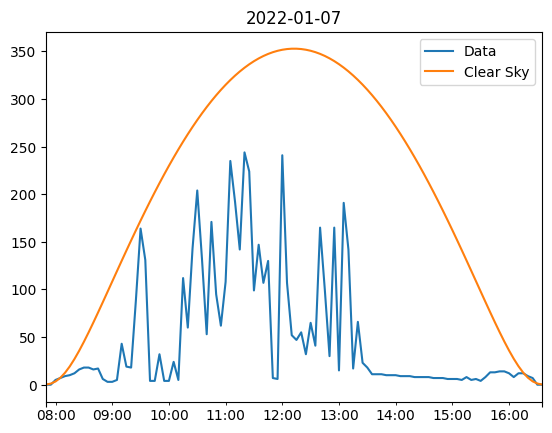

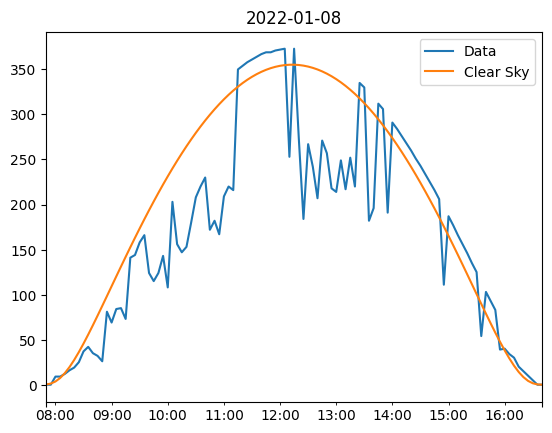

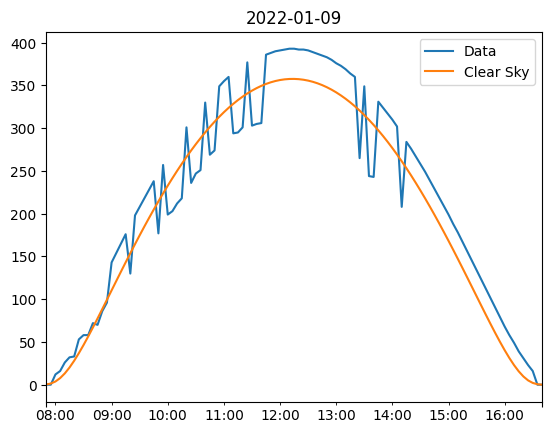

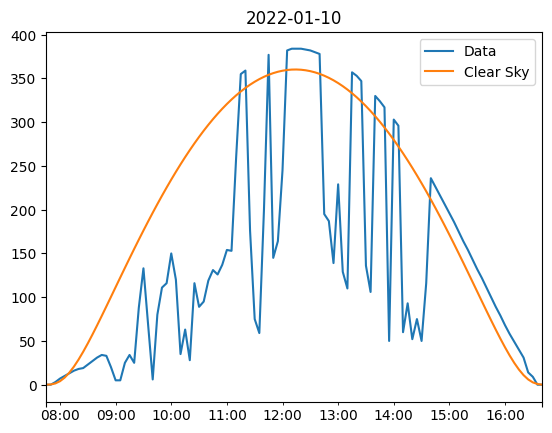

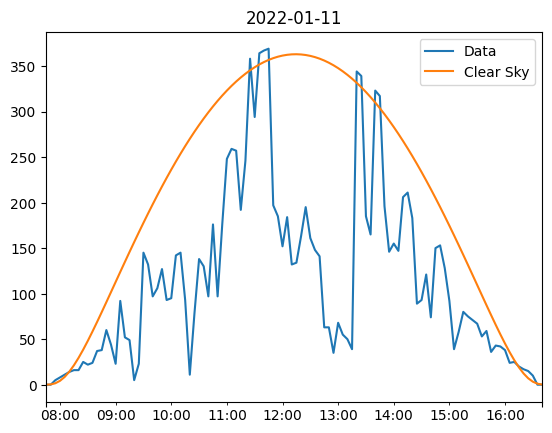

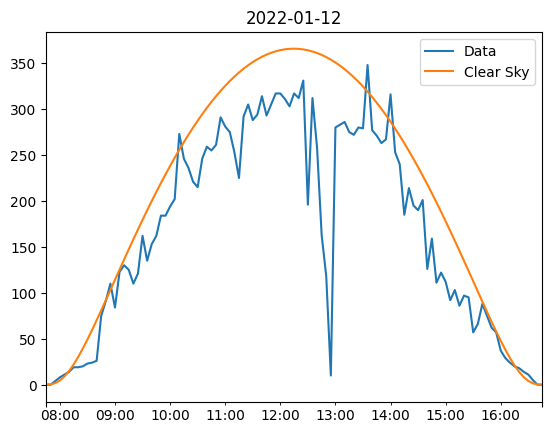

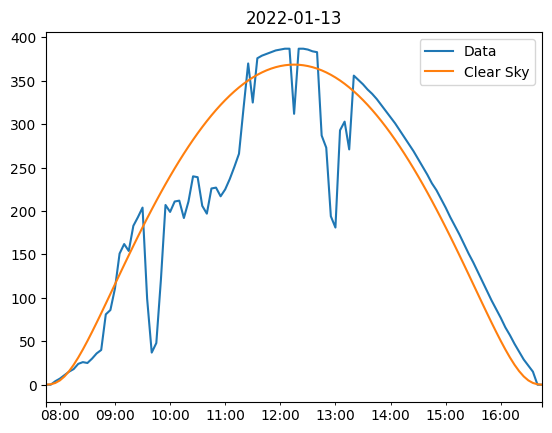

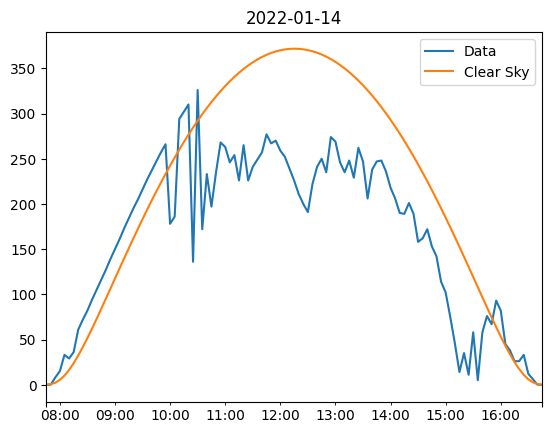

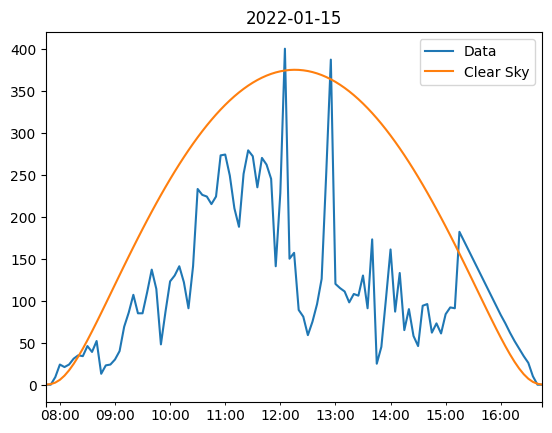

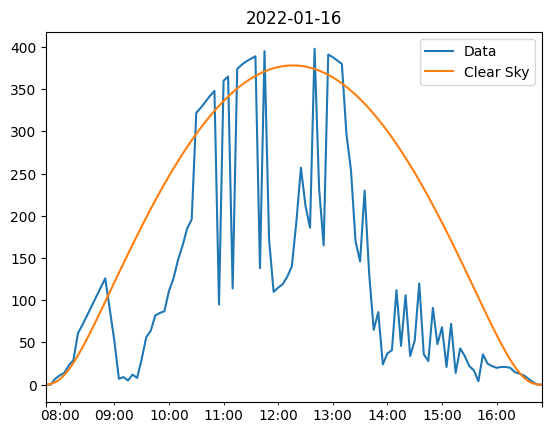

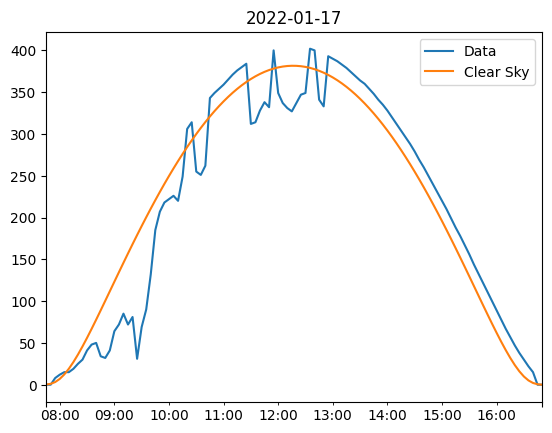

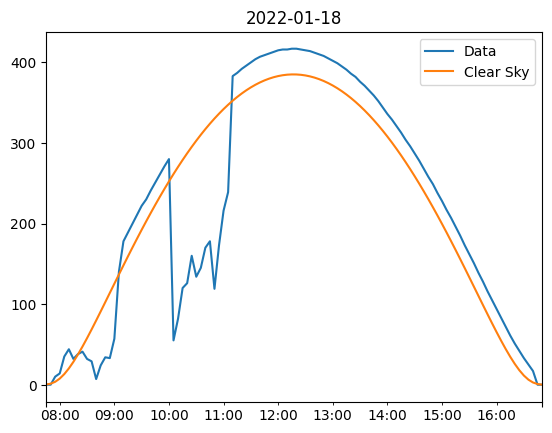

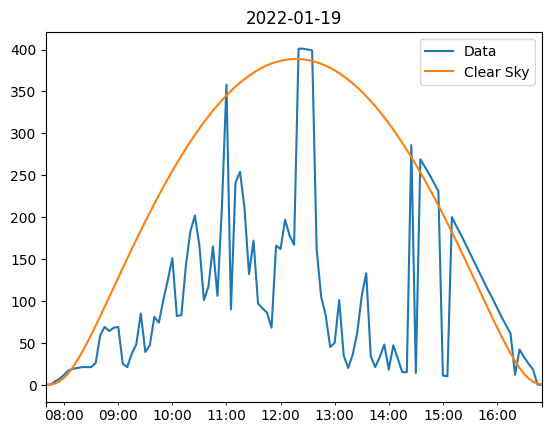

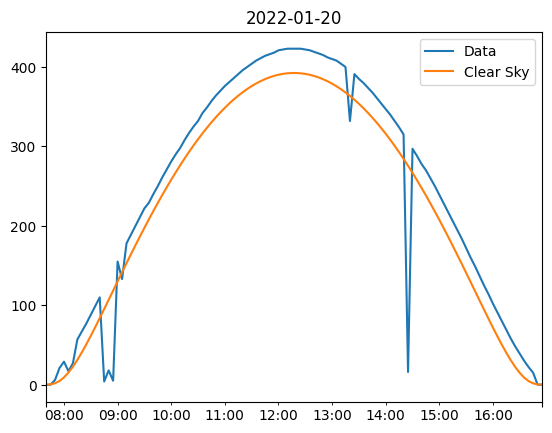

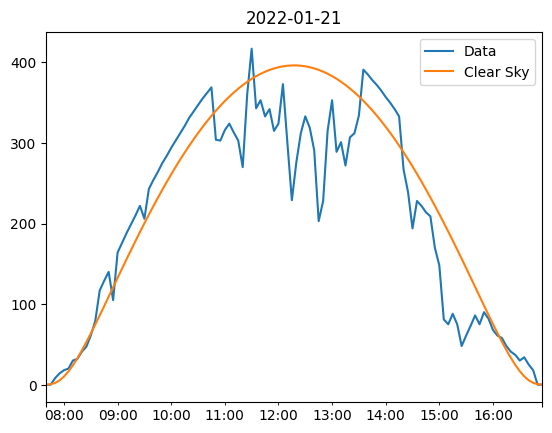

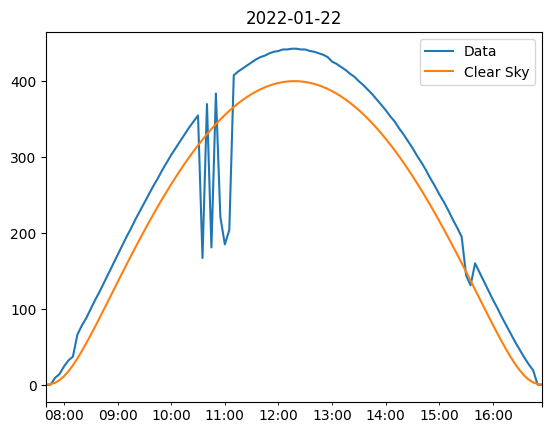

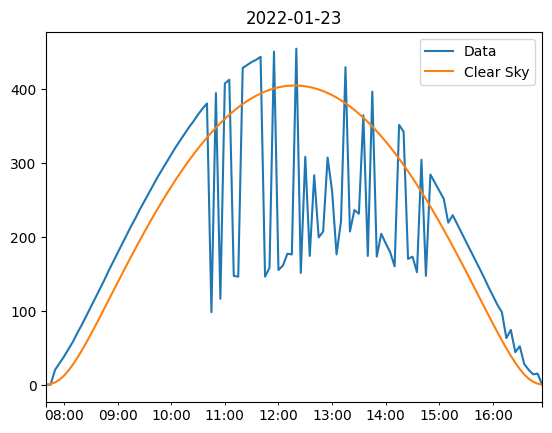

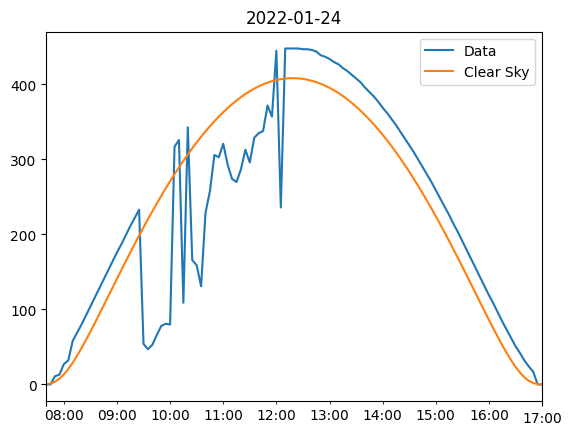

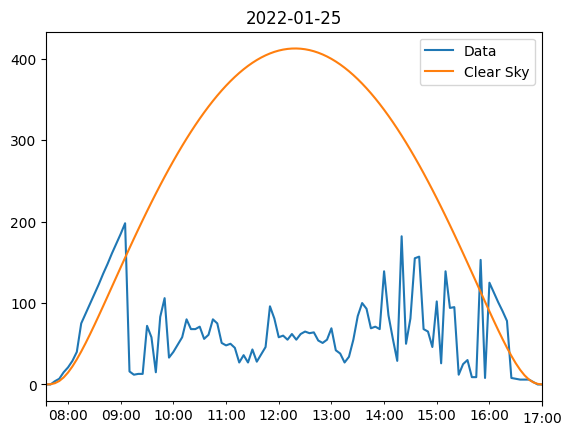

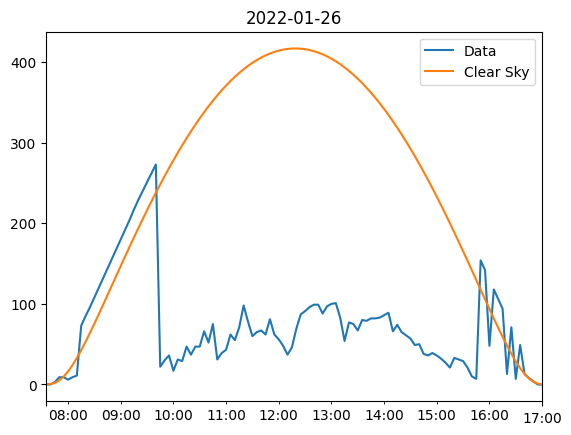

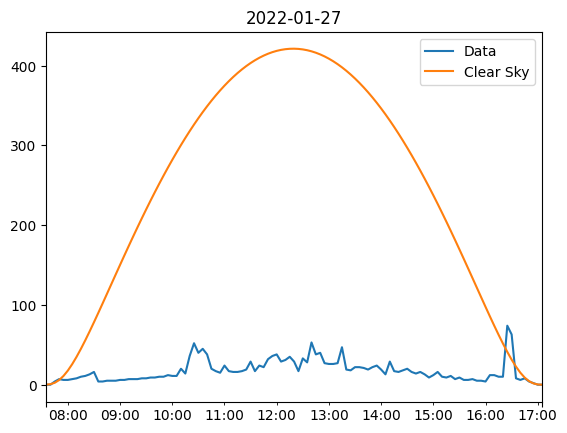

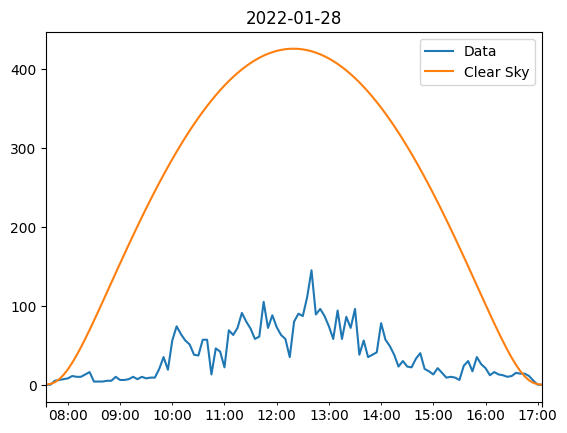

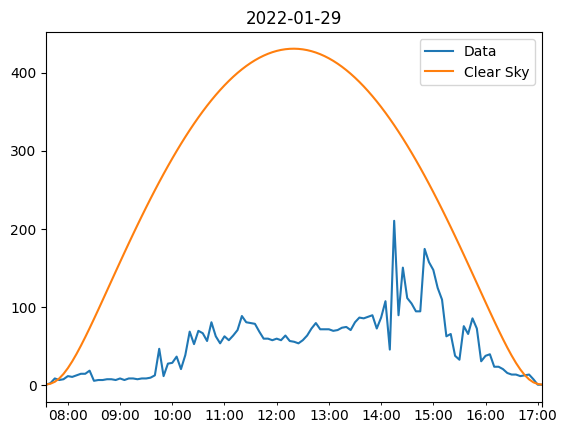

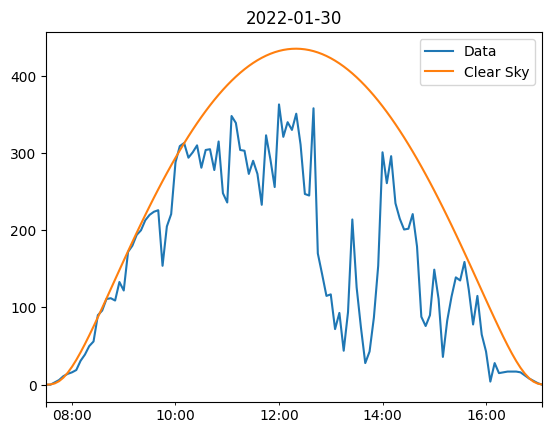

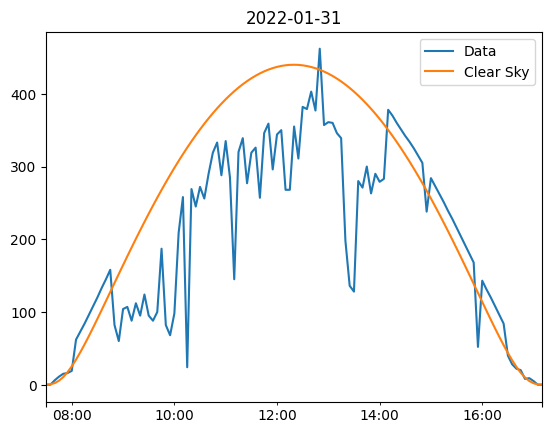

In [69]:
# Create a date range for January
dates = pd.date_range(start='2022-01-01', end='2022-01-31', tz=location.tz)

# Iterate over the dates
for date in dates:
    # Localize the date to the specified timezone
    
    # Create a DatetimeIndex from the localized_date
    date_index = pd.DatetimeIndex([date])
    
    # Get the sunrise and sunset times for the date
    sun_times = location.get_sun_rise_set_transit(date_index)
    
    # Extract the sunrise and sunset times and convert them to timestamps
    # sunrise = pd.Timestamp(sun_times['sunrise'].values[0], tz=location.tz)
    # sunset = pd.Timestamp(sun_times['sunset'].values[0], tz=location.tz)
    sunrise = sun_times['sunrise'].iloc[0]
    sunset = sun_times['sunset'].iloc[0]
    
    # Slice the data and clearsky_weather DataFrames to the range from sunrise to sunset
    psm3_weather_slice = psm3_weather.loc[sunrise:sunset]
    clearsky_weather_slice = clearsky_weather.loc[sunrise:sunset]
    # Create a plot of the 'ghi' column of the sliced psm3_weatherFrames
    fig, ax = plt.subplots()
    psm3_weather_slice['ghi'].plot(ax=ax, label='Data')
    clearsky_weather_slice['ghi'].plot(ax=ax, label='Clear Sky')
    
    # Add a title to the plot
    ax.set_title(date.strftime('%Y-%m-%d'))
    
    # Add a legend to the plot
    ax.legend()
    
    # Show the plot
    plt.show()